In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import newaxis


Using TensorFlow backend.


In [4]:
prices_dataset = pd.read_csv("E:/TATAMOTORS.BO (1).csv",header=0)
prices_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/7/2018,433.700012,443.549988,431.500000,436.149994,436.149994,1836374
1,1/14/2018,438.700012,439.899994,410.799988,418.950012,418.950012,4052903
2,1/21/2018,419.000000,424.200012,399.000000,400.200012,400.200012,1846832
3,1/28/2018,401.149994,406.000000,381.649994,384.049988,384.049988,2292777
4,2/4/2018,381.649994,398.399994,357.000000,369.200012,369.200012,6279666


In [5]:
prices_dataset.shape

(54, 7)

In [8]:
prices_dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
yahoo_stock_prices = prices_dataset.Close.values.astype('float32')


In [12]:
yahoo_stock_prices.shape

(54,)

In [15]:
yahoo_stock_prices = yahoo_stock_prices.reshape(54,1)

In [16]:
yahoo_stock_prices.shape

(54, 1)

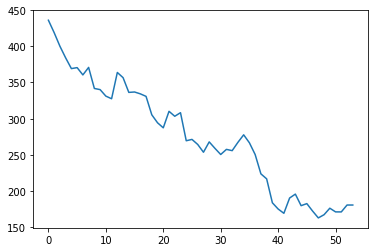

In [17]:
plt.plot(yahoo_stock_prices)
plt.show()

In [18]:
# scaling values
scaler = MinMaxScaler(feature_range=(0,1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [22]:
yahoo_stock_prices  # prices of stock is scaled down lying between 0 and 1

array([[1.        ],
       [0.9371575 ],
       [0.86865187],
       [0.80964553],
       [0.7553891 ],
       [0.7603215 ],
       [0.7234198 ],
       [0.7614176 ],
       [0.65491414],
       [0.64906836],
       [0.61618567],
       [0.60284984],
       [0.7358422 ],
       [0.70953596],
       [0.6350018 ],
       [0.6370113 ],
       [0.6276946 ],
       [0.6149068 ],
       [0.5217391 ],
       [0.48136652],
       [0.455791  ],
       [0.5392765 ],
       [0.5142492 ],
       [0.5323347 ],
       [0.39039087],
       [0.39715016],
       [0.3715747 ],
       [0.3322981 ],
       [0.38454515],
       [0.3518451 ],
       [0.32078916],
       [0.34673   ],
       [0.34033614],
       [0.38235295],
       [0.4203508 ],
       [0.37997812],
       [0.32060647],
       [0.22287178],
       [0.1976617 ],
       [0.07654363],
       [0.04512244],
       [0.02338332],
       [0.10065764],
       [0.12038726],
       [0.06192911],
       [0.07234198],
       [0.03470951],
       [0.   

In [23]:
len(yahoo_stock_prices)

54

In [24]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train , test = yahoo_stock_prices[0:train_size,:] , yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]

In [25]:
print(len(train),len(test))

43 11


In [27]:
# converting an array of values into a dataset matrix
def create_dataset(dataset,look_back=1):
    dataX , dataY = [] , []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
        
    return np.array(dataX) , np.array(dataY)

In [28]:
# reshaping into X=t and Y=t+1
look_back = 1
trainX , trainY = create_dataset(train,look_back)
testX , testY = create_dataset(test,look_back)

In [29]:
trainX.shape

(41, 1)

In [30]:
testX.shape

(9, 1)

In [34]:
trainX = np.reshape(trainX,(trainX.shape[0] , 1 , trainX.shape[1]))
testX = np.reshape(testX , (testX.shape[0] ,1 , testX.shape[1]))

In [35]:
print(trainX.shape)
print(testX.shape)

(41, 1, 1)
(9, 1, 1)


In [36]:
# building Model
model = Sequential()
model.add(LSTM(input_dim=1,output_dim=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse',optimizer='rmsprop')
print('compilation time : ' , time.time() - start )

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until


compilation time :  0.09889578819274902


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  if __name__ == '__main__':


In [37]:
model.fit(trainX,
         trainY,
         batch_size = 128,
         nb_epoch = 10,
         validation_split = 0.05)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 38 samples, validate on 3 samples
Epoch 1/10
38/38 [==============================] - 7s 177ms/step - loss: 0.3193 - val_loss: 0.0015
Epoch 2/10
38/38 [==============================] - 0s 421us/step - loss: 0.2957 - val_loss: 8.7734e-04
Epoch 3/10
38/38 [==============================] - 0s 34us/step - loss: 0.2803 - val_loss: 5.1778e-04
Epoch 4/10
38/38 [==============================] - 0s 487us/step - loss: 0.2653 - val_loss: 3.7154e-04
Epoch 5/10
38/38 [==============================] - 0s 395us/step - loss: 0.2508 - val_loss: 4.1158e-04
Epoch 6/10
38/38 [==============================] - 0s 421us/step - loss: 0.2394 - val_loss: 6.2586e-04
Epoch 7/10
38/38 [==============================] - 0s 447us/step - loss: 0.2282 - val_loss: 0.0010
Epoch 8/10
38/38 [==============================] - 0s 421us/step - loss: 0.2154 - val_loss: 0.0016
Epoch 9/10
38/38 [==============================] - 0s 327us/step - loss: 0.2017 - val_loss: 0.0023
Epoch 10/10
38/38 [===================

In [ ]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)


[[0.10426259]]
[[0.18301937]]
[[0.25750676]]
[[0.32985932]]
[[0.40099323]]
[[190.98666]
 [212.5424 ]
 [232.9296 ]
 [252.7325 ]
 [272.20184]]


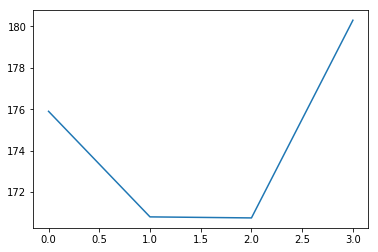

In [38]:
def plot_results_multiple(predicted_data , true_data , length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1,1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1,1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs


predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)
